# Assignment 8 Feature Selection done by Emdadul Haque

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("mobile data.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,772,0,1.1,1,12,0,39,0.8,81,7,...,1314,1854,2819,17,15,3,1,1,0,3
1,1709,1,2.1,0,1,0,13,1.0,156,2,...,974,1385,3283,17,1,15,1,0,0,3
2,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.shape

(2000, 21)

In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1136
px_width         1109
ram              1560
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [6]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,772,0,1.1,1,12,0,39,0.8,81,7,...,1314,1854,2819,17,15,3,1,1,0,3
1,1709,1,2.1,0,1,0,13,1.0,156,2,...,974,1385,3283,17,1,15,1,0,0,3
2,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
y=df['price_range']

In [8]:
x=df.drop(['price_range'],axis=1)

In [9]:
# y=df['price_range']
# x=df.drop(['price_range'],axis=1)

In [10]:
y.value_counts()

3    501
1    501
0    500
2    498
Name: price_range, dtype: int64

# Extra Tree Classifier

In [11]:
from sklearn.ensemble import ExtraTreesClassifier # Decison tree
extr = ExtraTreesClassifier()
extr.fit(x,y)

ExtraTreesClassifier()

In [12]:
extr.feature_importances_ # IG from decision tree

array([0.06122005, 0.01955365, 0.0330795 , 0.01931279, 0.03193865,
       0.01673674, 0.03460374, 0.03371344, 0.03567266, 0.03261854,
       0.03353593, 0.04752426, 0.0480583 , 0.39854246, 0.03341904,
       0.03320748, 0.03478587, 0.01491091, 0.01794253, 0.01962344])

In [13]:
imp=pd.DataFrame(extr.feature_importances_, columns=['Gain_Score'])
imp.head(10)

,Gain_Score
0,0.061220
1,0.019554
2,0.033080
3,0.019313
4,0.031939
5,0.016737
6,0.034604
7,0.033713
8,0.035673
9,0.032619


In [14]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [15]:
cols = pd.DataFrame(x.columns, columns=['Feature_Names'])
cols.head(10)

,Feature_Names
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [16]:
gains = pd.concat([cols,imp],axis=1)
gains.head(15)

,Feature_Names,Gain_Score
0,battery_power,0.061220
1,blue,0.019554
2,clock_speed,0.033080
3,dual_sim,0.019313
4,fc,0.031939
5,four_g,0.016737
6,int_memory,0.034604
7,m_dep,0.033713
8,mobile_wt,0.035673
9,n_cores,0.032619


In [17]:
gains.nlargest(15,'Gain_Score')

,Feature_Names,Gain_Score
13,ram,0.398542
0,battery_power,0.061220
12,px_width,0.048058
11,px_height,0.047524
8,mobile_wt,0.035673
16,talk_time,0.034786
6,int_memory,0.034604
7,m_dep,0.033713
10,pc,0.033536
14,sc_h,0.033419


In [18]:
newx=gains.nlargest(15,'Gain_Score')

<AxesSubplot:>

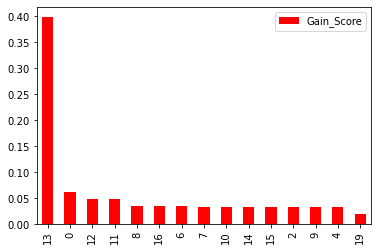

In [19]:
newx.plot(kind='bar',color=['red']) 

In [20]:
gains.nlargest(14,'Gain_Score')

,Feature_Names,Gain_Score
13,ram,0.398542
0,battery_power,0.061220
12,px_width,0.048058
11,px_height,0.047524
8,mobile_wt,0.035673
16,talk_time,0.034786
6,int_memory,0.034604
7,m_dep,0.033713
10,pc,0.033536
14,sc_h,0.033419


<AxesSubplot:>

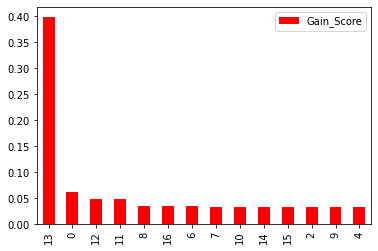

In [21]:
newx1=gains.nlargest(14,'Gain_Score')
newx1.plot(kind='bar',color=['red']) 

In [22]:
x.shape

(2000, 20)

In [23]:
import matplotlib.pyplot as plt

<AxesSubplot:>

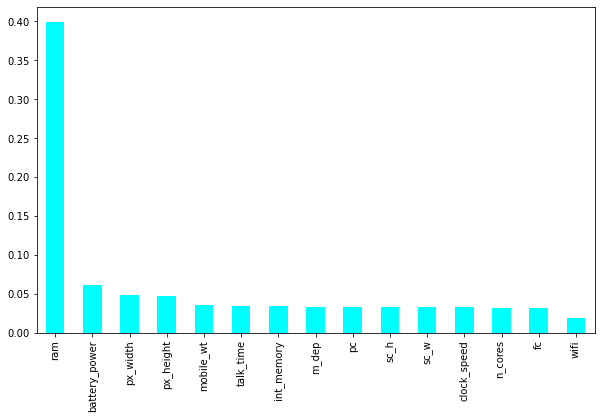

In [24]:
features = pd.Series(extr.feature_importances_, index = x.columns)
plt.figure(figsize=(10,6))
features.nlargest(15).plot(kind='bar', color='cyan')
#plt.savefig('score1.png')

In [25]:
#x=newx
x.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
battery_power,1.000000,0.011792,0.012088,-0.041499,0.031728,0.016252,-0.003256,0.035329,0.003405,-0.029628,0.029055,0.015460,-0.006547,-0.001211,-0.029862,-0.020972,0.050825,0.011937,-0.011438,-0.008686
blue,0.011792,1.000000,0.022208,0.033198,0.004421,0.010430,0.040035,0.004904,-0.008509,0.036176,-0.009759,-0.008042,-0.043692,0.025296,-0.002829,0.002223,0.015683,-0.032583,0.009071,-0.019863
clock_speed,0.012088,0.022208,1.000000,-0.000013,-0.002228,-0.040497,0.008211,-0.013967,0.013040,-0.005288,-0.006902,-0.012916,-0.006062,0.003320,-0.028834,-0.008453,-0.014586,-0.044436,0.019796,-0.025748
dual_sim,-0.041499,0.033198,-0.000013,1.000000,-0.027660,0.002204,-0.016619,-0.024364,-0.008833,-0.025111,-0.016035,-0.023092,0.011648,0.041313,-0.012072,-0.014825,-0.037682,-0.014008,-0.018137,0.022740
fc,0.031728,0.004421,-0.002228,-0.027660,1.000000,-0.016691,-0.028369,-0.001180,0.023103,-0.014089,0.644736,-0.010013,-0.005447,0.015840,-0.009773,-0.011747,-0.005679,0.002206,-0.013414,0.018552
four_g,0.016252,0.010430,-0.040497,0.002204,-0.016691,1.000000,0.006831,-0.004381,-0.015238,-0.030379,-0.005887,-0.021476,0.005709,0.007835,0.025434,0.037128,-0.045850,0.583661,0.014719,-0.016604
int_memory,-0.003256,0.040035,0.008211,-0.016619,-0.028369,0.006831,1.000000,0.006267,-0.033450,-0.028415,-0.033384,0.008719,-0.010383,0.032136,0.037661,0.013886,-0.001618,-0.010301,-0.028666,0.007938
m_dep,0.035329,0.004904,-0.013967,-0.024364,-0.001180,-0.004381,0.006267,1.000000,0.021180,-0.002929,0.026722,0.025173,0.022626,-0.010876,-0.024976,-0.017654,0.017614,-0.014169,-0.003156,-0.026069
mobile_wt,0.003405,-0.008509,0.013040,-0.008833,0.023103,-0.015238,-0.033450,0.021180,1.000000,-0.018178,0.018626,0.001784,0.001767,-0.003159,-0.033877,-0.021301,0.004002,0.002776,-0.014787,-0.000497
n_cores,-0.029628,0.036176,-0.005288,-0.025111,-0.014089,-0.030379,-0.028415,-0.002929,-0.018178,1.000000,-0.002329,-0.007519,0.024629,0.004643,0.000039,0.026433,0.013272,-0.015518,0.023113,-0.009535


In [26]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

<AxesSubplot:>

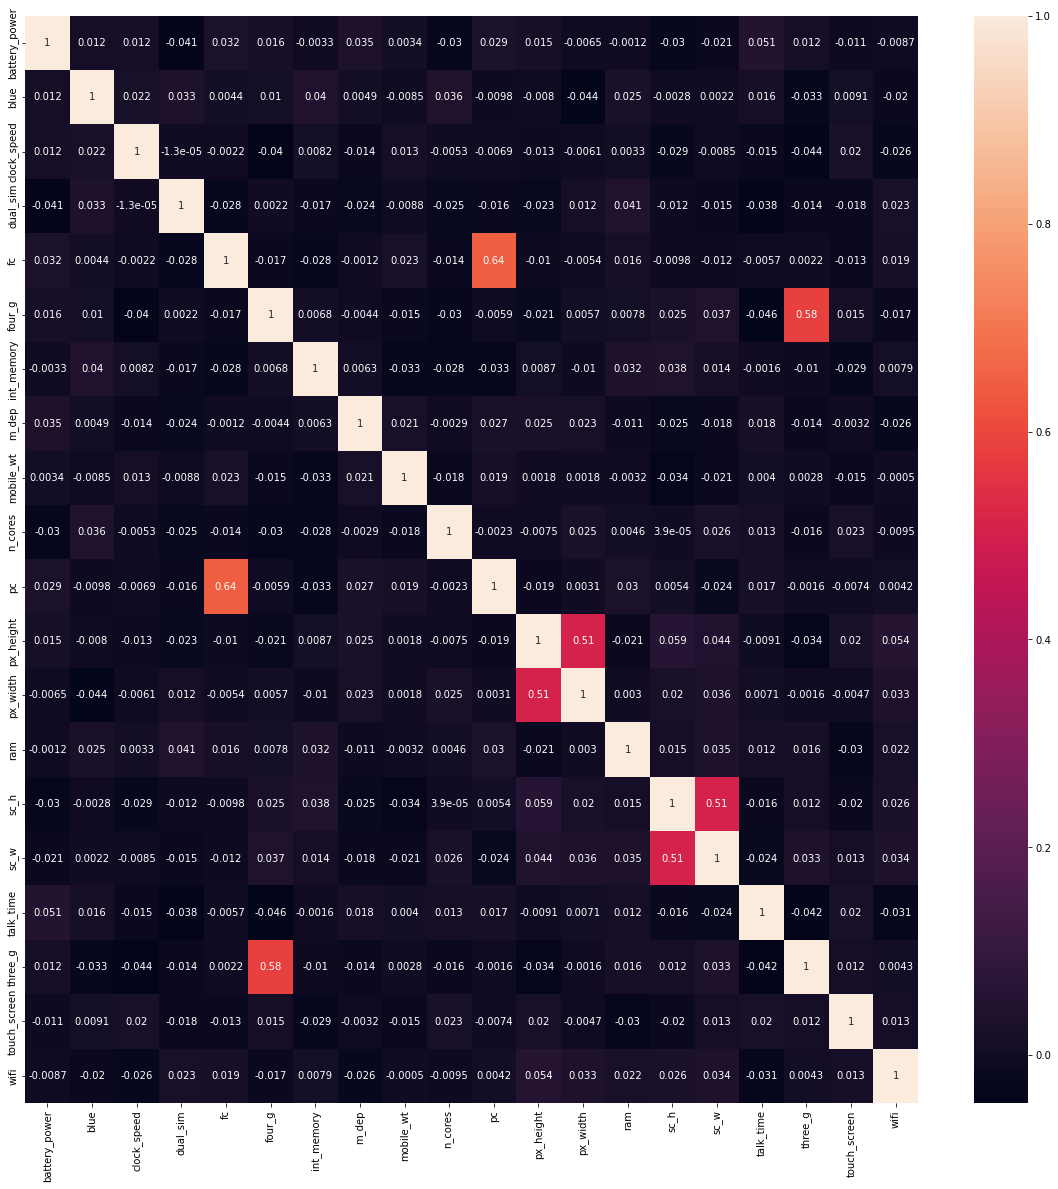

In [27]:
feature_names = x.columns #features name
colname = x.corr().index #features name
plt.figure(figsize=(20,20))
sns.heatmap(df[colname].corr(),annot=True)

# Select K Best

In [28]:
df = pd.read_csv("mobile data.csv")
y=df['price_range']
x=df.drop(['price_range'],axis=1)

In [29]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,772,0,1.1,1,12,0,39,0.8,81,7,14,1314,1854,2819,17,15,3,1,1,0
1,1709,1,2.1,0,1,0,13,1.0,156,2,2,974,1385,3283,17,1,15,1,0,0
2,1949,0,2.6,1,4,0,47,0.3,199,4,7,407,822,1433,11,5,20,0,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [30]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression #chi2 only when features are non negative

In [31]:
model=SelectKBest(score_func=f_classif)

In [32]:
feature_score=model.fit(x,y)

In [33]:
feature_score.scores_

array([3.11908732e+01, 4.59678478e-01, 6.13019154e-01, 4.89492949e-01,
       8.30396133e-01, 1.16710790e+00, 2.96575777e+00, 1.64410175e+00,
       3.62521255e+00, 2.58284723e+00, 8.74295515e-01, 1.95473713e+01,
       2.25200970e+01, 3.52623236e+03, 2.20350431e+00, 1.59731005e+00,
       1.66657575e+00, 4.39621377e-01, 1.45891088e+00, 2.61677203e-01])

In [34]:
cols = pd.DataFrame(feature_score.scores_ , columns=['Feature_Scores'])
cols

,Feature_Scores
0,31.190873
1,0.459678
2,0.613019
3,0.489493
4,0.830396
5,1.167108
6,2.965758
7,1.644102
8,3.625213
9,2.582847


In [35]:
col2 = pd.DataFrame(x.columns, columns=['Feature_Names'])
col2.head()

,Feature_Names
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc


In [36]:
scores = pd.concat([col2,cols],axis=1)
scores

,Feature_Names,Feature_Scores
0,battery_power,31.190873
1,blue,0.459678
2,clock_speed,0.613019
3,dual_sim,0.489493
4,fc,0.830396
5,four_g,1.167108
6,int_memory,2.965758
7,m_dep,1.644102
8,mobile_wt,3.625213
9,n_cores,2.582847


# The best Features are 

In [37]:
newx = scores.nlargest(15,'Feature_Scores')
newx

,Feature_Names,Feature_Scores
13,ram,3526.232362
0,battery_power,31.190873
12,px_width,22.520097
11,px_height,19.547371
8,mobile_wt,3.625213
6,int_memory,2.965758
9,n_cores,2.582847
14,sc_h,2.203504
16,talk_time,1.666576
7,m_dep,1.644102
